# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

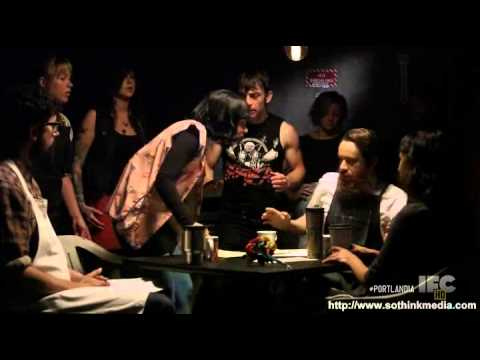

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\kjshe\\OneDrive\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [19]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [20]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0 star rating
2,The Factory - Cafe With a Soul,"11/30/2016 1 check-in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pricier coffee place but, to me it was worth it. After Thanksgiving nobody wants to make brunch so we headed out in search of chicken and waffles. There is ample parking in the private lot and ordering is done through I-Pads. Pick a seat and they will call your name when your items are ready. Be patient because some of the coffee drinks take longer than others. I had the cold brew coffee, chicken and waffles and we shared a pop+art! The po+art was strawberry; light and fluffy on the outside and gooey sweet filling on the inside. The chicken and waffles wasn't the standard so expect different, complex and interesting flavors from the accompanying slaw and sauce. I thoroughly enjoyed it but, the waffle was a bit bland and maybe could have used a bit of honey to spruce it up. The coffee here is spot on and I hear that their hot chocolate is the bomb but, I will have to wait for the weather to cool off to try that. A great place to be cozy and chat with your friends, a date or read a book. Chicken and waffles Pop tart Coffee See all photos from Carmela S. for The Factory - Cafe With a Soul",4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice seating However... Just about everything is overpriced. $1.50 extra for 3 ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd. Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average. It feels like a Los Angeles coffee shot that is out of place.,2.0 star rating
4,The Factory - Cafe With a Soul,"12/3/2016 1 check-in They are located within the Northcross mall shopping center facing east toward Burnet Rd with plenty of parking. I loved their computerized user friendly ordering system, it made it easy me to pick & choose all the items I wanted to try. I ordered pop tart, chicken & waffles, strawberry waffles (photos uploaded). This place is ideal for ordering a few dishes to share with your group. Seating is limited since this place is fairly new with lots of visitors. Arrive early and be prepared to wait a bit if you with a large grop. Store front facing Burnet Rd See all photos from Michelle A. for The Factory - Cafe With a Soul",4.0 star rating


In [21]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating     738 
 2.0 star rating     460 
 1.0 star rating     278 
Name: star_rating, dtype: int64

In [22]:
pd.set_option('display.max_row', 0)
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
Caffé Medici                            143
Apanas Coffee & Beer                    136
Lola Savannah Coffee Lounge             100
Cenote                                  100
Seventh Flag Coffee Co                  100
Quack’s 43rd Street Bakery              100
Sorrento’s Coffee                       100
                                       ... 
Mañana Coffee & Juice                   33 
Tuscany At 360                          33 
My Sweet Austin                         31 
Holy Grounds                            30 
Friends & Neighbors                     29 
Legend Coffee                           28 
Flitch Coffee                           28 
Lucky Lab Coffee                        25 
Sister Coffee                           17 
Kowabunga Coffee                

In [23]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [24]:
shops.head(2)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,"11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas?",5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!! Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice.",4.0 star rating


In [25]:
pd.set_option('display.max_colwidth', 0)
shops[['coffee_shop_name','full_review_text']].sample(20)

,coffee_shop_name,full_review_text
6505,Quack’s 43rd Street Bakery,"7/10/2016 Yesterday was our first visit to Quack's. Since there are not many bakeries in Austin, we are always on the look out for ANY bakery, let alone a good one. Several people had recommended this place and I really wanted to like it.... I was hoping that it was better than Bribery Bakery in Wells Branch, which we find to be just so-so. My only positive is that I like the Hyde Park neighborhood that it is located in. When I walked in the store and was waiting in line, I noticed the ceiling. It was disgustingly dirty. The whole place felt like it needed hosed down. As I looked into the glass cases, several things looked good. Several things were rather odd for what I normally see in a bakery. So many Vegan selections was a little off putting. Then, I saw a fly buzzing around the cookies in the case. I was willing to overlook all of that if the pastries actually tasted good. But.... We bought 3 things: blueberry Danish, strawberry thumb print type of cookies, and peanut butter cookies. It all cost about $20. We brought them home and tried everything for breakfast this morning. Everything tasted odd. I have never been to a bakery in my life where the items tasted so off. There is something about the dough or the butter or whatever ingredients they are using. Perhaps it just doesn't have enough sugar. Or maybe there is no sugar. The taste of the Strawberry cookies was a lot like strawberry and Crisco that left a bad aftertaste in your mouth. And it was kind of dry. The peanut butter cookies tasted like sand, were very very dry, and they had that same weird after taste. Could it be the butter they use? It makes me wonder if they know what they are doing when they are baking. Also it worries me that they are using some ingredient that I may be allergic to. And I am allergic to certain artificial sweeteners. I just don't trust their goods now and won't be back. We live in Pflugerville, so this place is not convenient for us. But, I would have been a regular and willing to drive all the way to it if the place wasn't so grungy and the food actually tasted good. I'm so disappointed."
829,Brian’s Brew,12/2/2016 Great little spot to get good coffee at low price..nice selection of coffee and tea..
1151,The Factory - Cafe With a Soul,"10/30/2016 1 check-in Super cute place for lounging and chatting up with a friend. The chicken and waffle was delicious. Chicken was cooked to perfection! Super moist chicken with fluffy waffle...more of a snack than a meal, so don't go here expecting to be filled with a meal."
6833,Teo,"7/17/2015 This place is where you want to go for Gelato in this town! Usually when someone suggests getting gelato I'm thinking they are either a 'hipster' or one of those 'healthy eaters' who avoids indulgent treats... Not so at TEO. I can honestly say it is the one place I've found where I truly choose to seek out Gelato over ice cream. It reminds me so much of what I ate internationally. So rich and creamy. Some of my personal favorites (though it's so difficult to pick just one) are the goat cheese and cherry - it is incredible and a must try! Coffee and oreo, nuts, whiskey pecan, coconut Nutella (can you think gelato mounds bar?) - heck they're all deliciously amazing! You won't be disappointed. They have a nice little patio with a fireplace outside and lots of newspapers to read inside. Even a TV if there's a major sporting event (usually European, so think world cup games). Dogs are welcome. Kids are often seen here mingling among those doing business. It's truly a neighborhood place immediately across the street from Seton Hospital. I'm not a coffee drinker so I cannot speak to the quality of their offering in that dept. They do have hot chocolate and it is one place that serves apple cider here locally (year round). While the cider doesn't compare with cider mills' on-site cider you get in other parts of the country, it still brings back good memo

In [26]:
shops.star_rating.value_counts().to_frame()

,star_rating
5.0 star rating,3780
4.0 star rating,2360
3.0 star rating,738
2.0 star rating,460
1.0 star rating,278


In [30]:
# How can we count the raw text?
shops['full_review_text'].value_counts()[:50]

 11/9/2016 1 check-in Listed in In Search of Fantastic Coffee So, I really didn't want to write this review. I didn't want to tell anyone how awesome The Factory - Cafe With a Soul is because I don't want it overrun and super busy with no place to sit like so many other decent coffee shops in Austin. I happened to come in here with a friend mid-week and we sat here for several hours, enjoying the peace and quiet, the atmosphere, and the awesome coffee.  This place is a little eclectic - lots of peculiar art, books, games, knick-knacks, and an almost head-scratching drink and food menu. Waffles and pop tarts...and beer? And... coffee mojitos? Well, it works. Whatever is going on here, it works fabulously. They serve Stumptown Coffee, which as someone from the Northwest, I totally appreciate. They also brew coffee correctly. There is not a hint of bitterness or overcooked milk going on here. The iPad ordering screens are mostly cool, (although they need more options for customization) an

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

